In [1]:
#!pip3 install --user matplotlib

import sys
#sys.modules[__name__].__dict__.clear()

import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import sparse
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA


In [2]:
aside=np.array([mpimg.imread(x) for x in glob.glob('/nfs/general/shared/KeyA/*.jpg')])
bside=np.array([mpimg.imread(x) for x in glob.glob('/nfs/general/shared/KeyD/*.jpg')])
y=np.zeros(aside.shape[0] + bside.shape[0])
y[:aside.shape[0]]=1.0
y[aside.shape[0]:]=0.0
X=np.concatenate((aside,bside),axis=0)
X=X.reshape(X.shape[0],-1)
kImgShape=aside.shape[1:]

def XtoImgShape(Xline):
    return Xline.reshape(aside.shape[1:])

def PlotSparseness(x):
    plt.imshow(np.where(x!=0,255,0), interpolation='nearest')
    
def GenSingleChannelDicts(s, windowSizes):
    for windowSize in windowSizes:
        for x in range(0, s[0], windowSize):
            for y in range(0, s[1], windowSize):
                r=np.zeros(s)
                r[x:x+windowSize,y:y+windowSize]=1
                yield r

def SpreadAcrossColors(mask):
    for i in [0,1,2]:
        r=np.zeros((*mask.shape,3))
        r[:,:,i]=mask
        yield r

def GenDict(s, windowSize):
    for d in GenSingleChannelDicts(s, windowSize):
        for m in SpreadAcrossColors(d):
            yield m

def GenDictSize(s, windowSize):
    size=0
    for d in GenSingleChannelDicts(s, windowSize):
        for m in SpreadAcrossColors(d):
            size += 1
    return size


In [ ]:
# %matplotlib widget
#plt.imshow(aside[0])

# from ipywidgets import Image
# #plt.imshow(bside[5])


# f=glob.glob('/nfs/general/shared/KeyA/*.jpg')[0]



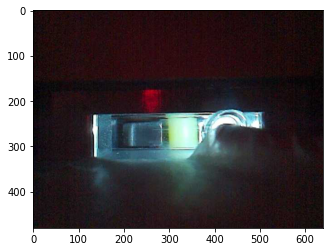

In [3]:
plt.imshow(aside[0])
plt.show()

In [ ]:
#sparse_mats=[sparse.coo_matrix(x.astype(np.float32).reshape((-1,1))) for x in GenDict(kImgShape[:2],[8,16,32])]
#proj=sparse.hstack(sparse_mats)
Xp=X.dot(proj)

In [ ]:
#proj=np.array([x for x in GenDict(kImgShape[:2],[16,32])])
#Xp=np.matmul(X, proj.reshape((proj.shape[0],-1)).transpose())
#proj=sparse.hstack([sparse.csr_matrix(x.astype(np.float32).reshape((-1,1))) for x in GenDict(kImgShape[:2],[8,16,32])], format='csr')

Xp=np.matmul(X, proj)

# foo=PCA(n_components=2).fit_transform(Xp.transpose())
# plt.scatter(foo[:,0],foo[:,1],color='r')
# plt.scatter(foo[:10,0],foo[:10,1],color='g')


#clf = linear_model.Lasso(alpha=0.1)
#clf.fit(X,y)

eps = 1e-3
#alphas_lasso, coefs_lasso, coefs = linear_model.lasso_path(X,Y, eps=eps, verbose=True,  alphas=np.logspace(-4, 1, 10))

alphas_lasso, coefs_lasso, coefs = linear_model.lasso_path(Xp,y,eps=eps, verbose=True,  alphas=np.logspace(-4, 4, 10))

#alphas_lars, coefs_lars, coefs = linear_model.lars_path(X, y, method="lasso", verbose=True)
#alphas_lars

In [ ]:
X.shape
#PlotSparseness(XtoImgShape(coefs_lasso[:,0]))

#coefs_lasso.shape

#plt.imshow(np.max(proj[coefs_lasso[:,2]!=0,:,:,:],axis=0), interpolation='nearest')


In [ ]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

#plt.imshow(np.max(proj[coefs_lasso[:,1]!=0,:,:,:],axis=0), interpolation='nearest')

#coefs_lasso[coefs_lasso[:,1]!=0,1]

In [ ]:
x=x.tocsc()

In [ ]:
#np.sum(coefs_lasso!=0,axis=0)

In [ ]:
#help(linear_model.lasso_path)

In [ ]:
#from sklearn.decomposition import sparse_encode 

In [ ]:
#help(sparse_encode)

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

# reduced_data = PCA(n_components=2).fit_transform(X)

In [ ]:
# plt.scatter(reduced_data[:,0],reduced_data[:,1],color='r')
# plt.scatter(reduced_data[:10,0],reduced_data[:10,1],color='b')

In [9]:
BASE_DIR='/nfs/general/shared'
A_FILES=glob.glob('{}/KeyA/*.jpg'.format(BASE_DIR))
D_FILES=glob.glob('{}/KeyD/*.jpg'.format(BASE_DIR))
[x.replace(BASE_DIR, '') for x in  D_FILES]


['/KeyD/1650026661289.jpg',
 '/KeyD/1650026697319.jpg',
 '/KeyD/1650026667845.jpg',
 '/KeyD/1650026789363.jpg',
 '/KeyD/1650026759156.jpg',
 '/KeyD/1650026750277.jpg',
 '/KeyD/1650026776503.jpg',
 '/KeyD/1650026772430.jpg',
 '/KeyD/1650026793428.jpg',
 '/KeyD/1650026640272.jpg',
 '/KeyD/1650026655348.jpg',
 '/KeyD/1650026692955.jpg',
 '/KeyD/1650026633587.jpg',
 '/KeyD/1650026746128.jpg',
 '/KeyD/1650026797874.jpg',
 '/KeyD/1650026695156.jpg',
 '/KeyD/1650026689007.jpg',
 '/KeyD/1650026705344.jpg',
 '/KeyD/1650026617590.jpg',
 '/KeyD/1650026721348.jpg',
 '/KeyD/1650026734459.jpg',
 '/KeyD/1650026785253.jpg',
 '/KeyD/1650026607699.jpg',
 '/KeyD/1650026736863.jpg',
 '/KeyD/1650026780472.jpg',
 '/KeyD/1650026791288.jpg',
 '/KeyD/1650026626966.jpg',
 '/KeyD/1650026744190.jpg',
 '/KeyD/1650026682043.jpg',
 '/KeyD/1650026754776.jpg',
 '/KeyD/1650026611962.jpg',
 '/KeyD/1650026642461.jpg',
 '/KeyD/1650026603443.jpg',
 '/KeyD/1650026659358.jpg',
 '/KeyD/1650026629241.jpg',
 '/KeyD/165002676769